### Binning analysis (Ground state energy)

In [169]:
#Perform binning analysis of observables obtained
#via boseHubbardVMC.py

import numpy as np
import matplotlib.pyplot as plt

def get_std_error(mc_data):
    '''Input array and calculate standard error'''
    N_bins = np.shape(mc_data)[0]
    std_error = np.std(mc_data)/np.sqrt(N_bins)
    
    return std_error

def get_binned_data(mc_data):
    '''Return neighbor averaged data.'''
    N_bins = np.shape(mc_data)[0]
    start_bin = N_bins % 2
    binned_mc_data = 0.5*(mc_data[start_bin::2]+mc_data[start_bin+1::2]) #Averages (A0,A1), (A2,A3), + ... A0 ignored if odd data

    return binned_mc_data

def get_autocorrelation_time(error_data):
    '''Given an array of standard errors, calculates autocorrelation time'''
    print(error_data[0],error_data[-2])
    autocorr_time = 0.5*((error_data[-2]/error_data[0])**2 - 1)
    return autocorr_time

In [217]:
#Load data

# Decide which U,mu files to evaluate
U_str = "0.0000"
mu_str = "0.0000"

kinetic_file_name = "../../Data/kinetic_4_4_"+U_str+"_"+mu_str+"_1.0000_0.0900_1.0000_500000.dat"
diagonal_file_name = "../../Data/diagonal_4_4_"+U_str+"_"+mu_str+"_1.0000_0.0900_1.0000_500000.dat"
kinetic_data = np.loadtxt(kinetic_file_name)
diagonal_data = np.loadtxt(diagonal_file_name)

# Calculate total ground state energy at each U/t
total_data = kinetic_data + diagonal_data

#Set from where to start the data depending on equilibration time
equil_time = 0.5 #Set the percentage of unequilibrated data to throw away
begin_data = int(np.shape(total_data)[0]*equil_time)
total_data = total_data[begin_data:]

#Extract BH and simulation parameters from file name
L,N,U,mu,t,eta,beta,mc_steps = kinetic_file_name.split("_")[1:]
mc_steps = mc_steps.split(".")[0] # get rid of extension
L,N,U,mu,t,eta,beta,mc_steps = int(L),int(N),float(U),float(mu),float(t),float(eta),float(beta),int(mc_steps)

#Determine max bin level
max_bin_level = int(np.log2(np.shape(total_data)[0]))
min_bin = 40

#Initialize list to save standard error
std_errors = []

#Binning loop
binned_data = np.copy(total_data)
for i in range(max_bin_level):
    print(np.shape(binned_data)[0])
    std_errors.append(get_std_error(binned_data))   
    if np.shape(binned_data)[0]/2 <= min_bin: break
    binned_data = get_binned_data(binned_data)

#print("<E_gs>: (Raw) %.12f (Binned) %.12f"%(np.mean(original_data),np.mean(binned_data)))

#Format the data file
std_errors = np.array(std_errors)
with open("egserr_%i_%i_%.4f_%.4f_%.4f_%.4f_%.4f_%i.dat"%(L,N,U,mu,t,eta,beta,mc_steps),"w+") as data:
    np.savetxt(data,std_errors,delimiter=" ",fmt="%.16f",header="MC_step <E> // BH Parameters: L=%d,N=%d,U=%.8f,mu=%.8f,t=%.4f,eta=%.8f,beta=%.4f,MC_steps=%i"%(L,N,U,mu,t,eta,beta,mc_steps))
    
    

4351
2175
1087
543
271
135
67


### Generate bin plot of ground state energy

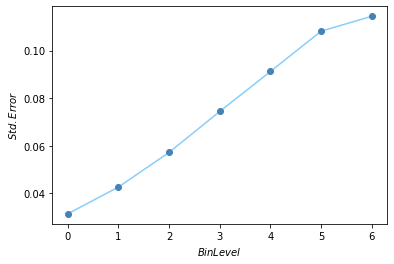

In [218]:
# Load egs vs bin level data
data = np.loadtxt("egserr_4_4_"+U_str+"_"+mu_str+"_1.0000_0.0900_1.0000_500000.dat")

#Determine the number of bin levels
bin_levels = [float(i) for i in range(np.size(data))]

#Plot
fig, ax1 = plt.subplots()
ax1.plot(bin_levels,data,'-',color='lightskyblue',label='9.9763')
ax1.plot(bin_levels,data,'o',color='steelblue',label='9.9763')
#ax1.axhline(y=-1.71173196633913,linewidth=1,color="#cccccc",zorder=0)
#ax1.text(1.5,-0.4,r'Exact Egs: $-1.71173196633913$')
ax1.set_ylabel(r"$Std. Error$")
ax1.set_xlabel(r"$Bin Level$")
#ax1.set_xlim(data00[:,0][0],data00[:,0][325])
#ax1.set_xlim(data16b[:,0][0],data16b[:,0][-1])
#ax1.set_ylim(-2,6)
#plt.legend(ncol=2,title=r"$U$")

plt.savefig("egserr_%i_%i_%.4f_%.4f_%.4f_%.4f_%.4f_%i.pdf"%(L,N,U,mu,t,eta,beta,mc_steps))

In [219]:
# Print the standard error
print("The std. error is",max(data))

The std. error is 0.1144004301690445
